In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from ast import literal_eval

In [2]:
base_path = "../data"
train_path = os.path.join(base_path, "train.csv")
test_path = os.path.join(base_path, "sample_submission.csv")

In [3]:
df_train = pd.read_csv(train_path, converters={"bbox": literal_eval})
df_train.head(10)

image_id  width  height                          bbox   source
0  b6ab77fd7   1024    1024    [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024   [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024   [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024   [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024   [26.0, 144.0, 124.0, 117.0]  usask_1
5  b6ab77fd7   1024    1024  [569.0, 382.0, 119.0, 111.0]  usask_1
6  b6ab77fd7   1024    1024     [52.0, 602.0, 82.0, 45.0]  usask_1
7  b6ab77fd7   1024    1024   [627.0, 302.0, 122.0, 75.0]  usask_1
8  b6ab77fd7   1024    1024    [412.0, 367.0, 68.0, 82.0]  usask_1
9  b6ab77fd7   1024    1024   [953.0, 220.0, 56.0, 103.0]  usask_1

In [4]:
df_train.dtypes

image_id    object
width        int64
height       int64
bbox        object
source      object
dtype: object

In [5]:
df_test = pd.read_csv(test_path)
df_test.head()

image_id PredictionString
0  aac893a91    1.0 0 0 50 50
1  51f1be19e    1.0 0 0 50 50
2  f5a1f0358    1.0 0 0 50 50
3  796707dd7    1.0 0 0 50 50
4  51b3e36ab    1.0 0 0 50 50

In [6]:
df_train.shape

(147793, 5)

In [7]:
df_test.shape

(10, 2)

In [8]:
df_train.describe()

width    height
count  147793.0  147793.0
mean     1024.0    1024.0
std         0.0       0.0
min      1024.0    1024.0
25%      1024.0    1024.0
50%      1024.0    1024.0
75%      1024.0    1024.0
max      1024.0    1024.0

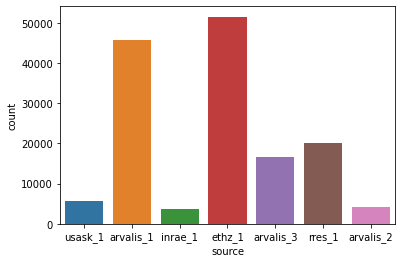

In [9]:
sns.countplot(x='source', data=df_train)
plt.show()

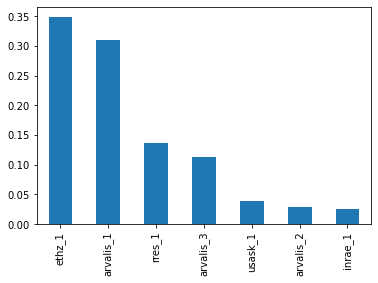

In [10]:
df_train['source'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [11]:
sample = df_train.sample(25)

In [12]:
images = [os.path.join(base_path, "train", f"{x}.jpg") for x in sample['image_id'].values]
images[0]

'../data/train/f72cabcea.jpg'

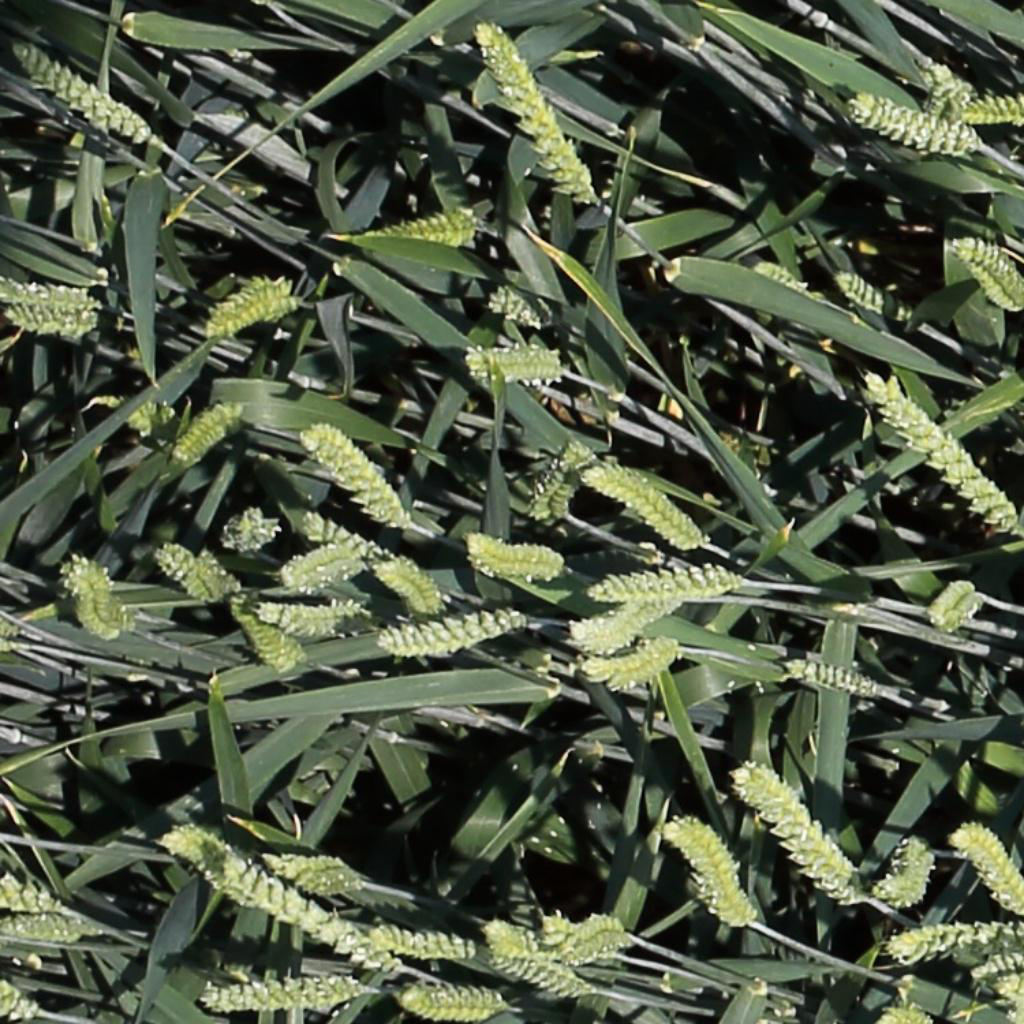

In [13]:
Image.open(images[12])

In [14]:
df_train.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [15]:
df_train.iloc[0]['bbox']

[834.0, 222.0, 56.0, 36.0]

In [16]:
df_train['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

In [17]:
df_train[df_train['image_id'] == "5e0747034"]['bbox'].values

array([list([273.0, 284.0, 113.0, 92.0]),
       list([494.0, 125.0, 105.0, 92.0]),
       list([412.0, 220.0, 115.0, 97.0]),
       list([332.0, 404.0, 131.0, 87.0]),
       list([289.0, 742.0, 87.0, 72.0]), list([775.0, 586.0, 72.0, 56.0]),
       list([389.0, 927.0, 180.0, 97.0]),
       list([673.0, 337.0, 79.0, 95.0]),
       list([911.0, 243.0, 110.0, 79.0]),
       list([668.0, 81.0, 110.0, 70.0]), list([716.0, 7.0, 80.0, 64.0]),
       list([217.0, 865.0, 115.0, 102.0]),
       list([916.0, 46.0, 64.0, 56.0]), list([852.0, 640.0, 82.0, 94.0]),
       list([64.0, 619.0, 84.0, 95.0]), list([292.0, 549.0, 107.0, 82.0]),
       list([134.0, 228.0, 141.0, 71.0]),
       list([430.0, 13.0, 184.0, 79.0]), list([875.0, 740.0, 94.0, 61.0])],
      dtype=object)

In [18]:
df_comb = {}
for image_id in df_train['image_id'].unique():
    df_comb[image_id] = [df_train[df_train['image_id'] == image_id]['bbox'].values]
    
df_comb = pd.DataFrame.from_dict(df_comb, orient='index').reset_index()
df_comb.columns = ["image_id", "bboxes"]
df_comb.head()

image_id                                             bboxes
0  b6ab77fd7  [[834.0, 222.0, 56.0, 36.0], [226.0, 548.0, 13...
1  b53afdf5c  [[988.0, 781.0, 36.0, 96.0], [331.0, 863.0, 70...
2  7b72ea0fb  [[332.0, 662.0, 113.0, 50.0], [285.0, 755.0, 3...
3  91c9d9c38  [[124.0, 273.0, 59.0, 73.0], [688.0, 939.0, 61...
4  41c0123cc  [[0.0, 669.0, 73.0, 111.0], [572.0, 757.0, 110...

In [21]:
df_comb['image_path'] = df_comb['image_id'].apply(lambda x: os.path.join(base_path, "train", f"{x}.jpg"))
df_comb.head()

image_id                                             bboxes  \
0  b6ab77fd7  [[834.0, 222.0, 56.0, 36.0], [226.0, 548.0, 13...   
1  b53afdf5c  [[988.0, 781.0, 36.0, 96.0], [331.0, 863.0, 70...   
2  7b72ea0fb  [[332.0, 662.0, 113.0, 50.0], [285.0, 755.0, 3...   
3  91c9d9c38  [[124.0, 273.0, 59.0, 73.0], [688.0, 939.0, 61...   
4  41c0123cc  [[0.0, 669.0, 73.0, 111.0], [572.0, 757.0, 110...   

                    image_path  
0  ../data/train/b6ab77fd7.jpg  
1  ../data/train/b53afdf5c.jpg  
2  ../data/train/7b72ea0fb.jpg  
3  ../data/train/91c9d9c38.jpg  
4  ../data/train/41c0123cc.jpg

In [22]:
def display_samples(df, n_img=3):
    """Displays n_img X n_img images in a grid"""
    sample_size = n_img ** 2
    total_imgs, _ = df.shape
    sample = df.sample(sample_size)
    
    if n_img > 1:
        fig, axs = plt.subplots(n_img, n_img, figsize=(16, 16))
        for i, ax in enumerate(axs.ravel()):
            _, bboxes, image_path  = df.iloc[i].values
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            for bbox in bboxes:
                bbox = [int(x) for x in bbox]
                img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1]+bbox[3]), (255, 0, 0), 2)

            ax.imshow(img)

        plt.show()
        
    else:
        _, bboxes, image_path  = df.iloc[0].values
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for bbox in bboxes:
            bbox = [int(x) for x in bbox]
            img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1]+bbox[3]), (255, 0, 0), 2)

        fig = plt.figure(figsize=(12, 12))
        plt.imshow(img)
        plt.show()

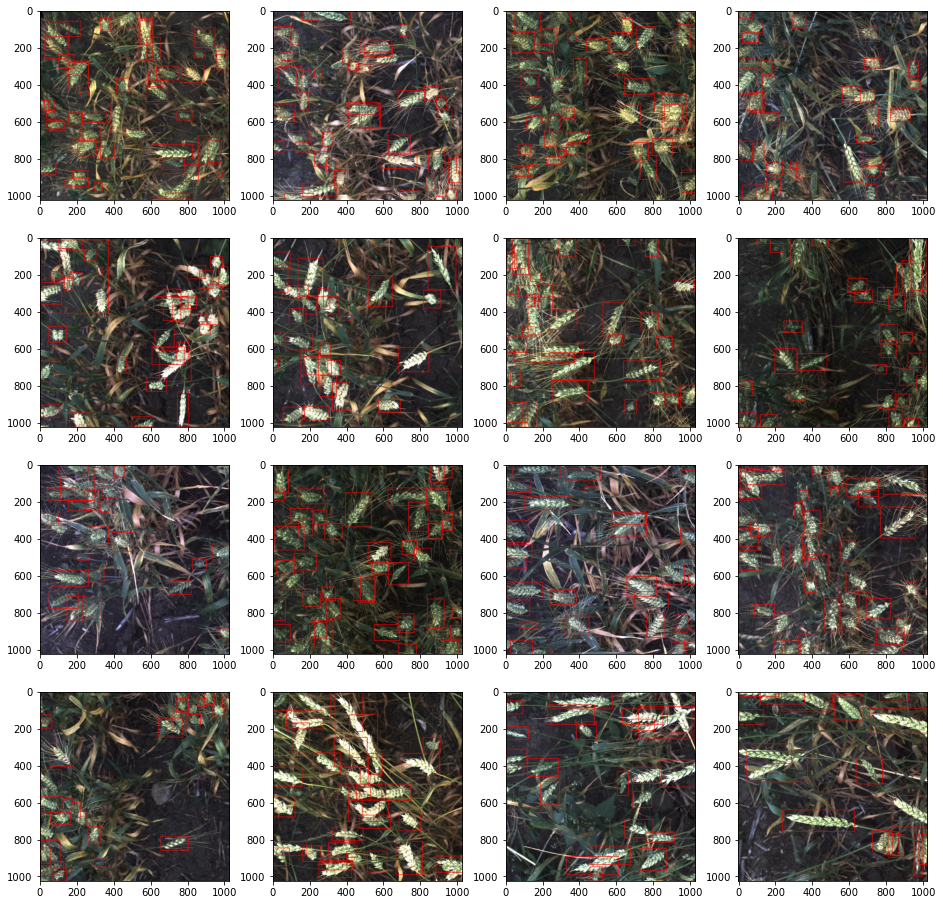

In [23]:
display_samples(df_comb, 4)

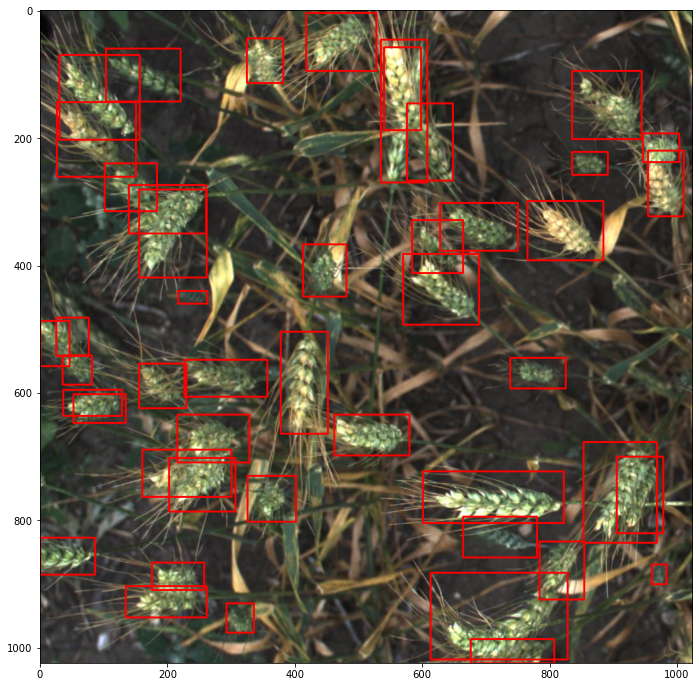

In [24]:
display_samples(df_comb, 1)